# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder ,LabelEncoder
from sklearn.preprocessing import RobustScaler , StandardScaler , MinMaxScaler

### Loading Data_set

In [2]:
loan = pd.read_csv('loan_approval_dataset_nullvalues.csv')
loan.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,NaN,No,9600000,29900000,12,778,2400000.0,17600000.0,NaN,8000000.0,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,NaN,2200000.0,8800000.0,3300000.0,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000.0,NaN,33300000.0,12800000.0,Rejected
3,4,3,NaN,No,8200000,30700000,8,467,18200000.0,3300000.0,23300000.0,7900000.0,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000.0,8200000.0,29400000.0,5000000.0,Rejected


In [3]:
# MAKING COPY
df = loan.copy()

### Distribute the data into Numerical and Caetgorical

In [4]:
Numerical = []
Categorical = []
for col in df:
    if df[col].dtypes != 'O':
        Numerical.append(col)
    else:
        Categorical.append(col)
print(Numerical)
print(Categorical)

['loan_id', 'no_of_dependents', 'income_annum', 'loan_amount', 'loan_term', 'cibil_score', 'residential_assets_value', 'commercial_assets_value', 'luxury_assets_value', 'bank_asset_value']
['education', 'self_employed', 'loan_status']


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   loan_id                   4269 non-null   int64  
 1   no_of_dependents          4269 non-null   int64  
 2   education                 3629 non-null   object 
 3   self_employed             3928 non-null   object 
 4   income_annum              4269 non-null   int64  
 5   loan_amount               4269 non-null   int64  
 6   loan_term                 4269 non-null   int64  
 7   cibil_score               4269 non-null   int64  
 8   residential_assets_value  3885 non-null   float64
 9   commercial_assets_value   4141 non-null   float64
 10  luxury_assets_value       4013 non-null   float64
 11  bank_asset_value          3843 non-null   float64
 12  loan_status               4269 non-null   object 
dtypes: float64(4), int64(6), object(3)
memory usage: 433.7+ KB


### Handlig Missing_values

<Axes: xlabel='bank_asset_value', ylabel='Density'>

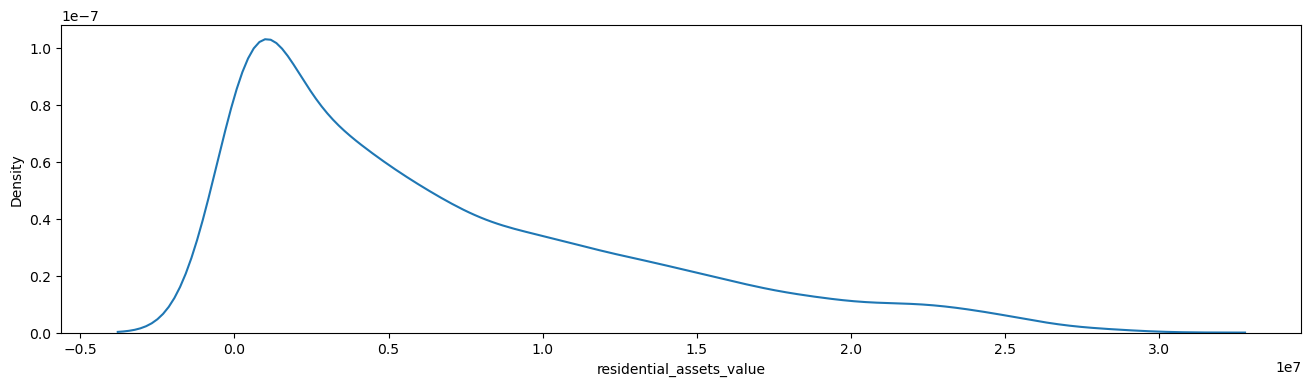

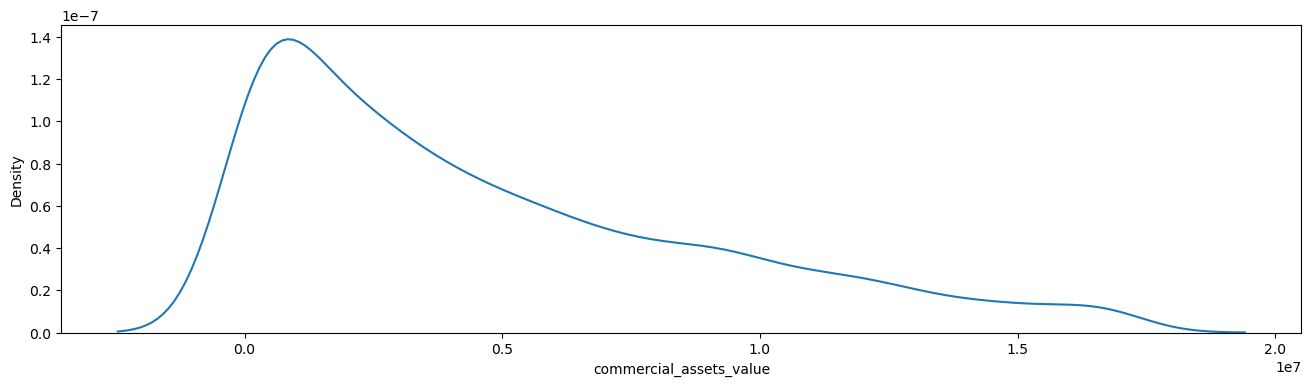

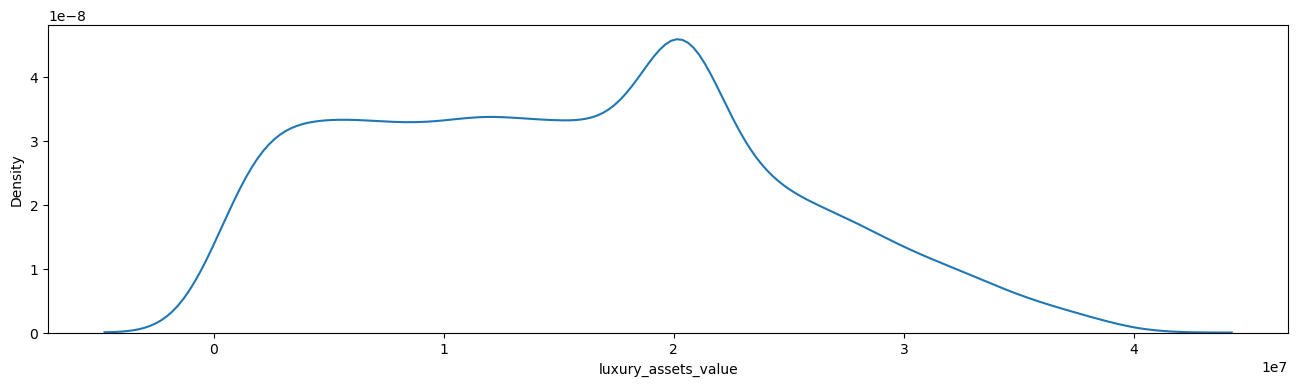

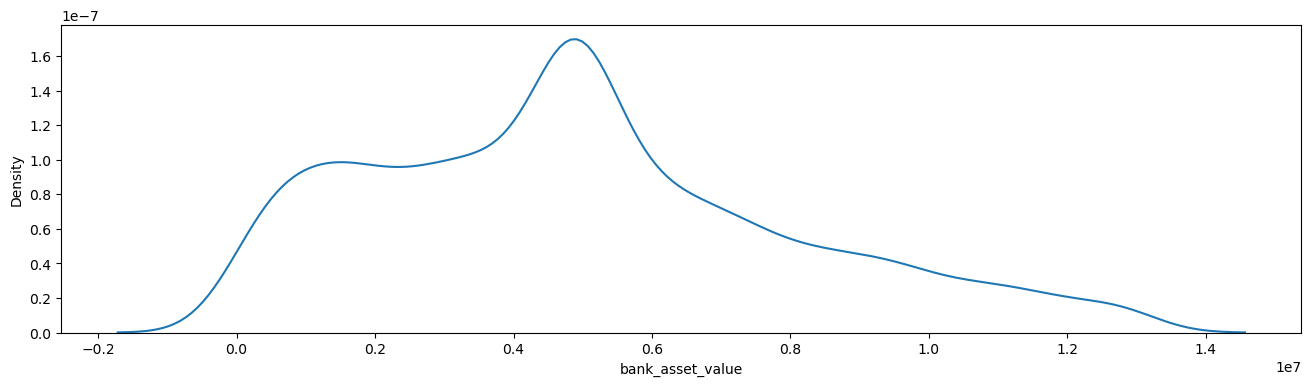

In [44]:
plt.figure(figsize=(16,4))
sns.kdeplot(df['residential_assets_value'])
plt.figure(figsize=(16,4))
sns.kdeplot(df['commercial_assets_value'])
plt.figure(figsize=(16,4))
sns.kdeplot(df['luxury_assets_value'])
plt.figure(figsize=(16,4))
sns.kdeplot(df['bank_asset_value'])

In [6]:
df.isnull().sum()

loan_id                       0
no_of_dependents              0
education                   640
self_employed               341
income_annum                  0
loan_amount                   0
loan_term                     0
cibil_score                   0
residential_assets_value    384
commercial_assets_value     128
luxury_assets_value         256
bank_asset_value            426
loan_status                   0
dtype: int64

In [7]:
df['education'].fillna(df['education'].mode().values[0],inplace = True)
df['self_employed'].fillna(df['self_employed'].mode().values[0],inplace = True)
df['residential_assets_value'].fillna(df['residential_assets_value'].mode().values[0],inplace = True)
df['commercial_assets_value'].fillna(df['commercial_assets_value'].mode().values[0],inplace = True)
df['luxury_assets_value'].fillna(df['luxury_assets_value'].mode().values[0],inplace = True)
df['bank_asset_value'].fillna(df['bank_asset_value'].mode().values[0],inplace = True)

In [8]:
df.isnull().sum()

loan_id                     0
no_of_dependents            0
education                   0
self_employed               0
income_annum                0
loan_amount                 0
loan_term                   0
cibil_score                 0
residential_assets_value    0
commercial_assets_value     0
luxury_assets_value         0
bank_asset_value            0
loan_status                 0
dtype: int64

### Handing_Outliers

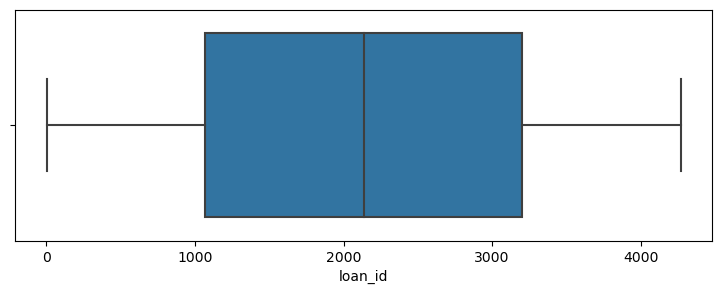

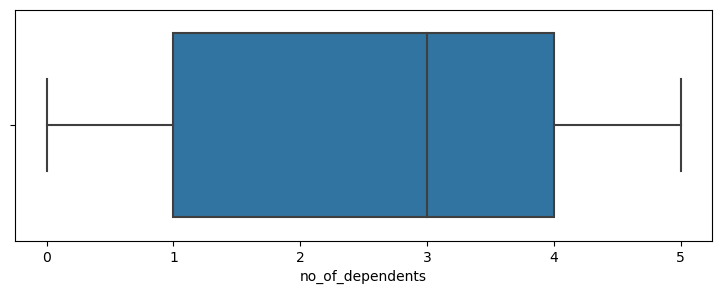

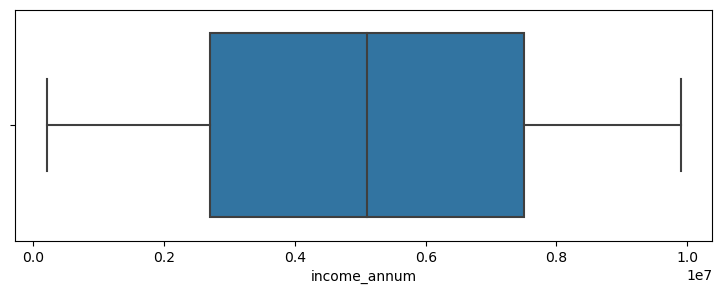

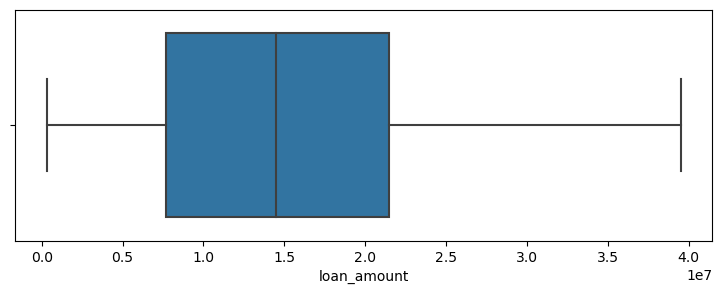

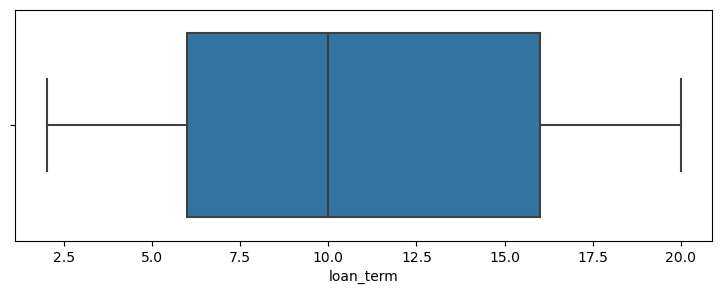

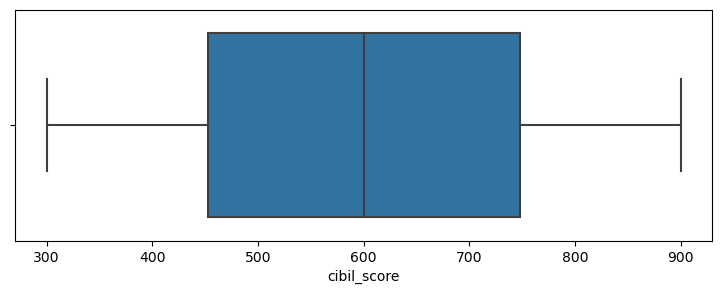

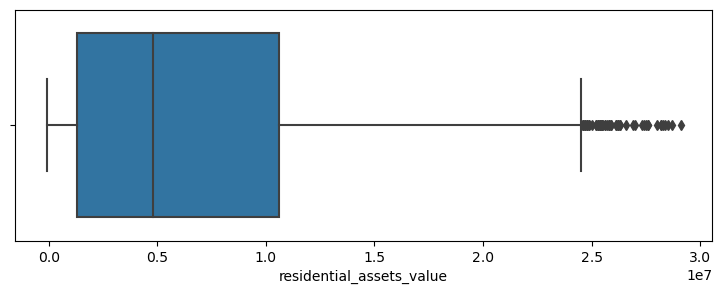

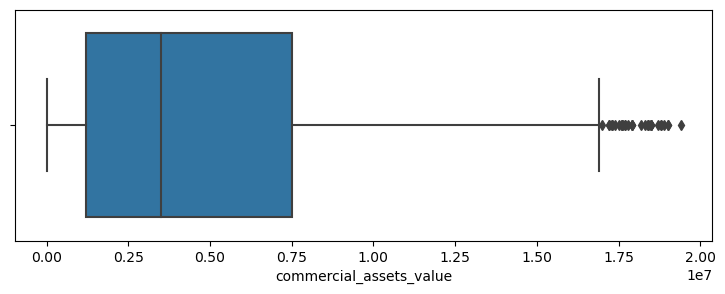

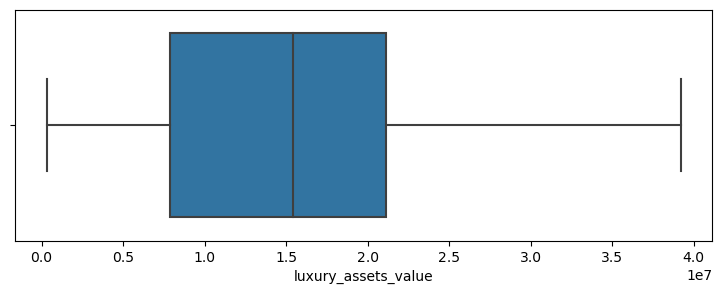

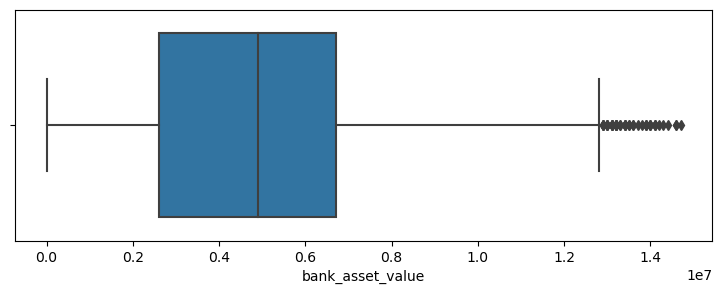

In [9]:
for col in Numerical:
    plt.figure(figsize=(9,3))
    sns.boxplot(df , x = col)

### Commercial_assets_value

In [10]:
percent25 = np.quantile(df['commercial_assets_value'], 0.25)
percent75 = np.quantile(df['commercial_assets_value'], 0.75)

IQR = percent75 - percent25

upper_limit = percent75 + 1.5 * IQR
lower_limit = percent25 - 1.5 * IQR

In [11]:
print('Upper_limit', upper_limit)
print('Upper_limit', lower_limit)

Upper_limit 16950000.0
Upper_limit -8250000.0


In [12]:
df['commercial_assets_value'] = np.where(
    df['commercial_assets_value'] > upper_limit,
    upper_limit,
    np.where(
    df['commercial_assets_value'] < lower_limit,
    lower_limit,
        df['commercial_assets_value']
    
    )
)

<Axes: >

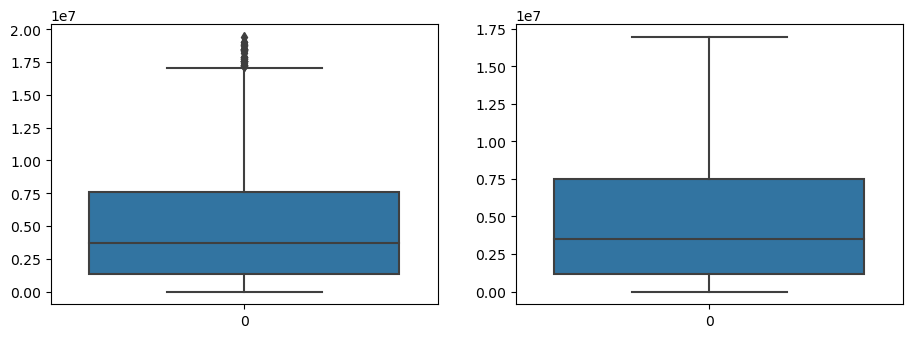

In [13]:
plt.figure(figsize = (11,8))
plt.subplot(2,2,1)
sns.boxplot(loan['commercial_assets_value'])

plt.subplot(2,2,2)
sns.boxplot(df['commercial_assets_value'])

### Bank_asset_value

In [14]:
percent25 = np.quantile(df['bank_asset_value'], 0.25)
percent75 = np.quantile(df['bank_asset_value'], 0.75)

IQR = percent75 - percent25

upper_limit1 = percent75 + 1.5 * IQR
lower_limit1 = percent25 - 1.5 * IQR

In [15]:
print('Upper_limit', upper_limit1)
print('Upper_limit', lower_limit1)

Upper_limit 12850000.0
Upper_limit -3550000.0


In [16]:
df['bank_asset_value'] = np.where(
    df['bank_asset_value'] > upper_limit1,
    upper_limit1,
    np.where(
    df['bank_asset_value'] < lower_limit1,
    lower_limit1,
        df['bank_asset_value']
    
    )
)

<Axes: >

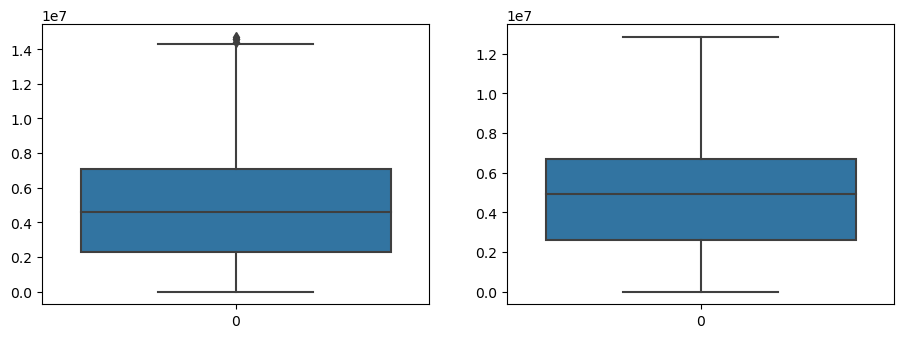

In [17]:
plt.figure(figsize = (11,8))
plt.subplot(2,2,1)
sns.boxplot(loan['bank_asset_value'])

plt.subplot(2,2,2)
sns.boxplot(df['bank_asset_value'])

## Exploratory Data Analysis

### Gender

In [61]:
df['education'].value_counts()

education
 Not Graduate    2459
 Graduate        1810
Name: count, dtype: int64

### Creating Model

In [18]:
X = df.iloc[:,:-1]

In [19]:
y = df['loan_status']

In [20]:
X_train , X_test , y_train , y_test  = train_test_split(X,y , train_size = 0.7)

In [21]:
X_train.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
2796,2797,1,Graduate,No,3900000,8000000,6,448,100000.0,1900000.0,9800000.0,4000000.0
3159,3160,3,Graduate,No,8400000,31100000,18,599,20600000.0,14100000.0,20400000.0,8500000.0
3698,3699,5,Not Graduate,Yes,500000,1800000,20,615,500000.0,700000.0,1100000.0,300000.0
410,411,5,Graduate,No,7100000,18900000,12,360,10700000.0,1100000.0,19800000.0,8500000.0
1339,1340,5,Not Graduate,Yes,8800000,26600000,16,545,19100000.0,16600000.0,30400000.0,7600000.0


### Columns Transformer 

In [22]:
categorical_columns = ['education', 'self_employed']

In [23]:
col_trans = ColumnTransformer(
    transformers=[
        ('ohe', OneHotEncoder(drop='first', handle_unknown='ignore'), categorical_columns),
        ('simple', SimpleImputer(), Numerical),
        ('scaler', RobustScaler(), Numerical)
    ],
    remainder='passthrough'
)

In [24]:
col_trans

ColumnTransformer(remainder='passthrough',
                  transformers=[('ohe',
                                 OneHotEncoder(drop='first',
                                               handle_unknown='ignore'),
                                 ['education', 'self_employed']),
                                ('simple', SimpleImputer(),
                                 ['loan_id', 'no_of_dependents', 'income_annum',
                                  'loan_amount', 'loan_term', 'cibil_score',
                                  'residential_assets_value',
                                  'commercial_assets_value',
                                  'luxury_assets_value', 'bank_asset_value']),
                                ('scaler', RobustScaler(),
                                 ['loan_id', 'no_of_dependents', 'income_annum',
                                  'loan_amount', 'loan_term', 'cibil_score',
                                  'residential_assets_value',
                                  'commercial_assets_value',
                                  'luxury_assets_value', 'bank_asset_value'])])

### Making Model  linear Regression

In [25]:
from sklearn.linear_model import LogisticRegression
lr =  LogisticRegression()
lr

LogisticRegression()

In [26]:
X_test.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
1360,1361,4,Not Graduate,Yes,8700000,30000000,4,370,17600000.0,15600000.0,34600000.0,12100000.0
4048,4049,2,Not Graduate,No,7400000,22500000,16,834,6400000.0,12600000.0,15700000.0,6000000.0
2260,2261,4,Not Graduate,No,8600000,22600000,14,729,300000.0,16200000.0,20500000.0,11900000.0
4067,4068,2,Not Graduate,Yes,2100000,6900000,2,566,700000.0,1500000.0,8100000.0,1000000.0
2955,2956,0,Not Graduate,Yes,1200000,3200000,18,473,2100000.0,600000.0,20400000.0,1200000.0


In [27]:
X_train_col = col_trans.fit_transform(X_train)
X_test_col = col_trans.transform(X_test)

In [28]:
X_train_col

array([[ 0.00000000e+00,  0.00000000e+00,  2.79700000e+03, ...,
        -2.57028112e-01, -4.19847328e-01, -2.19512195e-01],
       [ 0.00000000e+00,  0.00000000e+00,  3.16000000e+03, ...,
         1.70281124e+00,  3.89312977e-01,  8.78048780e-01],
       [ 1.00000000e+00,  1.00000000e+00,  3.69900000e+03, ...,
        -4.49799197e-01, -1.08396947e+00, -1.12195122e+00],
       ...,
       [ 0.00000000e+00,  1.00000000e+00,  2.80700000e+03, ...,
        -4.97991968e-01,  4.88549618e-01,  5.12195122e-01],
       [ 1.00000000e+00,  1.00000000e+00,  1.67100000e+03, ...,
        -5.14056225e-01, -7.70992366e-01, -7.31707317e-01],
       [ 1.00000000e+00,  1.00000000e+00,  1.35400000e+03, ...,
        -1.12449799e-01, -3.58778626e-01, -6.34146341e-01]])

In [29]:
label_enc = LabelEncoder()
ytrain_label_col = label_enc.fit_transform(y_train)
ytest_label_col = label_enc.transform(y_test)
ytrain_label_col

array([1, 0, 0, ..., 1, 1, 0])

In [30]:
y_test

1360     Approved
4048     Approved
2260     Approved
4067     Approved
2955     Rejected
          ...    
529      Approved
3615     Approved
1277     Rejected
3277     Approved
3464     Approved
Name: loan_status, Length: 1281, dtype: object

In [31]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean') 
X_train_imputed = imputer.fit_transform(X_train_col)
X_test_imputed = imputer.transform(X_test_col)

In [32]:
X_train_imputed

array([[ 0.00000000e+00,  0.00000000e+00,  2.79700000e+03, ...,
        -2.57028112e-01, -4.19847328e-01, -2.19512195e-01],
       [ 0.00000000e+00,  0.00000000e+00,  3.16000000e+03, ...,
         1.70281124e+00,  3.89312977e-01,  8.78048780e-01],
       [ 1.00000000e+00,  1.00000000e+00,  3.69900000e+03, ...,
        -4.49799197e-01, -1.08396947e+00, -1.12195122e+00],
       ...,
       [ 0.00000000e+00,  1.00000000e+00,  2.80700000e+03, ...,
        -4.97991968e-01,  4.88549618e-01,  5.12195122e-01],
       [ 1.00000000e+00,  1.00000000e+00,  1.67100000e+03, ...,
        -5.14056225e-01, -7.70992366e-01, -7.31707317e-01],
       [ 1.00000000e+00,  1.00000000e+00,  1.35400000e+03, ...,
        -1.12449799e-01, -3.58778626e-01, -6.34146341e-01]])

In [33]:
lr.fit(X_train_imputed, ytrain_label_col )

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [34]:
y_pred_encode = lr.predict(X_test_imputed)

In [35]:
y_pred_encode

array([1, 0, 0, ..., 1, 0, 0])

In [36]:
from sklearn.metrics import accuracy_score ,precision_score , recall_score

In [37]:
accuracy = accuracy_score(ytest_label_col, y_pred_encode)
print(accuracy)

0.7330210772833724


### Decission Tree

In [38]:
from sklearn.tree import DecisionTreeClassifier

In [39]:
dt  = DecisionTreeClassifier()

In [40]:
dt.fit(X_train_imputed, ytrain_label_col)

DecisionTreeClassifier()

In [41]:
y_pred_encoded = dt.predict(X_test_imputed)

In [42]:
from sklearn.metrics import accuracy_score, classification_report

In [43]:
accuracy = accuracy_score(y_pred_encoded, ytest_label_col)
report = classification_report( ytest_label_col, y_pred_encoded)
print("Accuracy:", accuracy)

Accuracy: 0.9718969555035128
